# TP 1 - Équation de la chaleur
## Schéma explicite

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et schéma explicite :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2} = 0. $$ 

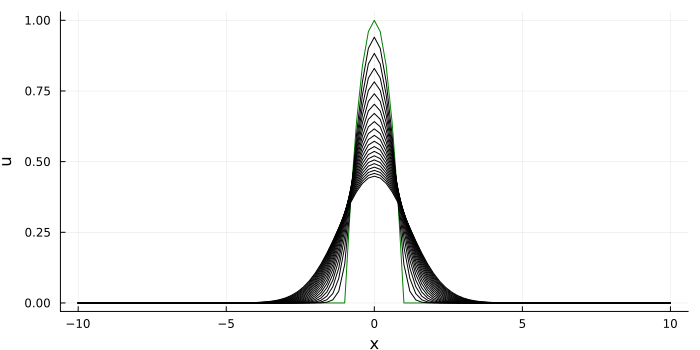

In [141]:
using LinearAlgebra, Plots

# Parameters (ce avec quoi on va jouer)
L = 10.0                               # domain half size
Nx = 100                               # grid size (space)
Δx = 2*L/(Nx*16)                            # step size (space)
σ = 0.1                                # CFL (max 0.5, que se pass-t-il quand on dépasse ?)
Δt = 0.0000001 #σ * Δx^2                          # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition
θ = 0                #θ-scheme parameter

"""
# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

B = Tridiagonal(σ*ones(Nx), 1 .- 2*σ*ones(Nx+1), σ*ones(Nx))

for n = 1:Nt
    u = B*u
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))
"""
# theta scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

A = Tridiagonal(-θ*σ*ones(Nx), 1 .+2*θ*σ*ones(Nx+1), -θ*σ*ones(Nx))
B = Tridiagonal(θ*(1-θ)*σ*ones(Nx), 1 .-2*θ*(1-θ)*σ*ones(Nx+1), θ*(1-θ)*σ*ones(Nx))

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

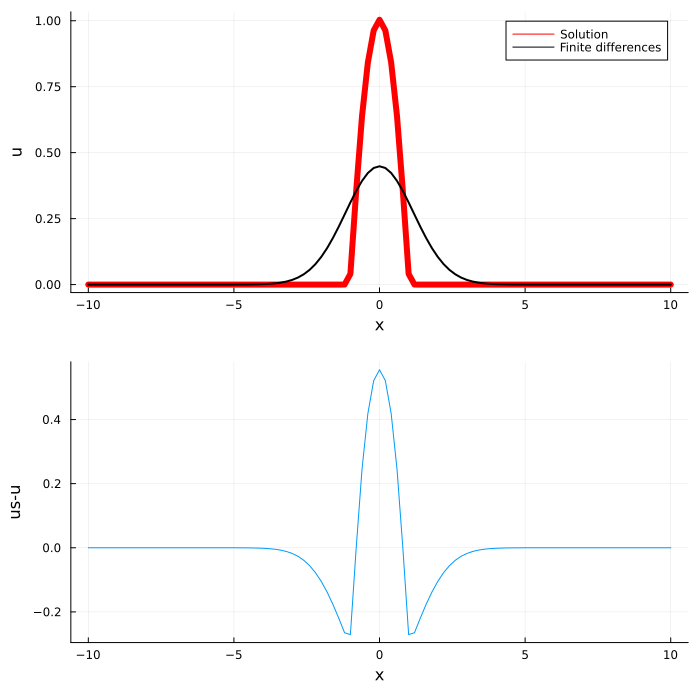

Δx: 0.0125	 Δt:1.0e-7	 max error: 0.5552761942629807


In [142]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1) #solution exacte a un instant t
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

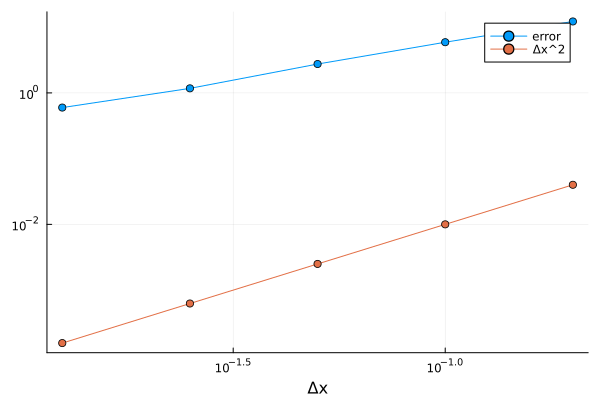

In [143]:
# Precision test
Δx = [ 0.2 , 0.1 , 0.05 , 0.025 , 0.0125]
errx = [ 12.210069574303029 , 5.90223826925263 , 2.748322616727592 , 1.1725899585288266 , 0.5981356839972805]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

# Tâche 1 : Etude de précision en x

## 1. Faire tourner le code pour différentes valeurs de $\Delta X$ (décroissance en divisant par 2 chaque fois)

On remarque qu'en faisant varier $\Delta X$ de 0.2 jusqu'à 0.0125, l'erreur reste constante à l'échelle logarithmique.

## 2. Fixer $\Delta t = 0.0000001$ (très petit). Faire tourner le code pour $\Delta X = 0.2 , 0.1 , 0.05 , 0.025$

L'erreur croit maintenant quasi linéairement (car elle est composée de 2 droites) à l'échelle logarithmique.

# Tâche 2 : 

## 1. Ecrire le $\theta$ - schéma sous forme matricielle $AU^{n+1} = U^n$

done

## 2. Introduire le nouveau paramètre $\theta$ dans le code et les matrices A et B à la place de la matrice B. La ligne U = B*u sera remplacée par U = A \ (B*u)
done

# 3. Refaire l'étude de précision pour différentes valeurs de $\theta$


# 4. Tester les différentes valeurs de $\sigma$ pour $\theta < 1/2$, $\theta = 1/2$ et $\theta > 1/2$

Je choisis $\theta = 0.25$. L'erreur croit linéairement à l'échelle logarithmique.

Pour $\theta = 0.5$, on obtient à peu près le même résultat.

Pour $\theta = 0.75$, on obtient à peu près le même résultat.
